# Fully-Connected Neural Nets
In this exercise we will implement fully-connected networks in Minpy by using a modular approach. For each layer we will implement a `forward` function. The `forward` function will receive inputs, weights, and other parameters and will return an output. Backward propagation are handled by minpy's auto-derivative feature, thus relieves the bruden of defining backward functions.

In addition to implementing fully-connected networks of arbitrary depth, we will also explore different update rules for optimization, and introduce Dropout as a regularizer and Batch Normalization as a tool to more efficiently optimize deep networks.
  

In [1]:
# As usual, a bit of setup

import time
import numpy as np
import matplotlib.pyplot as plt
# from cs231n.classifiers.fc_net import *
from cs231n.classifiers.fc_net_minpy import TwoLayerNet, FullyConnectedNet # import minpy's model
from cs231n.data_utils import get_CIFAR10_data
from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

I[0508 11:33:02 18072 mocking.py:25:__init__] Initialize module: minpy.numpy.random
I[0508 11:33:02 18072 mocking.py:33:__init__] Importing from minpy.array_variants.numpy.random
I[0508 11:33:02 18072 mocking.py:40:__init__] Got 53 primitives from minpy.array_variants.numpy.random
I[0508 11:33:02 18072 mocking.py:33:__init__] Importing from minpy.array_variants.mxnet.random
I[0508 11:33:02 18072 mocking.py:40:__init__] Got 2 primitives from minpy.array_variants.mxnet.random
I[0508 11:33:02 18072 mocking.py:44:__init__] Import 55 primitives
I[0508 11:33:02 18072 mocking.py:25:__init__] Initialize module: minpy.numpy
I[0508 11:33:02 18072 mocking.py:33:__init__] Importing from minpy.array_variants.numpy
I[0508 11:33:02 18072 mocking.py:40:__init__] Got 396 primitives from minpy.array_variants.numpy
I[0508 11:33:02 18072 mocking.py:33:__init__] Importing from minpy.array_variants.mxnet
I[0508 11:33:02 18072 mocking.py:40:__init__] Got 21 primitives from minpy.array_variants.mxnet
I[0508 1

In [3]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()
for k, v in data.iteritems():
  print '%s: ' % k, v.shape

X_val:  (1000, 3, 32, 32)
X_train:  (49000, 3, 32, 32)
X_test:  (1000, 3, 32, 32)
y_val:  (1000,)
y_train:  (49000,)
y_test:  (1000,)


# Solver
In the previous assignment, the logic for training models was coupled to the models themselves. Following a more modular design, for this assignment we have split the logic for training models into a separate class.

Open the file `cs231n/solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves at least `50%` accuracy on the validation set.

In [4]:
model = TwoLayerNet()

##############################################################################
# TODO: Use a Solver instance to train a TwoLayerNet that achieves at least  #
# 50% accuracy on the validation set.                                        #
##############################################################################


solver = Solver(model, data, optim_config={'learning_rate': 1e-3,}, lr_decay=0.95, print_every = 100)
solver.train()

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

(Iteration 1 / 4900) loss: 9.008275
(Epoch 0 / 10) train acc: 0.150000; val_acc: 0.152000
(Iteration 101 / 4900) loss: 2450.355711
(Iteration 201 / 4900) loss: 1325185.163414
(Iteration 301 / 4900) loss: 30275009183.192783
(Iteration 401 / 4900) loss: 120477818894.741745
(Epoch 1 / 10) train acc: 0.130000; val_acc: 0.156000
(Iteration 501 / 4900) loss: 96296670175.705551
(Iteration 601 / 4900) loss: 15842187471.016119
(Iteration 701 / 4900) loss: 338561112212.088745
(Iteration 801 / 4900) loss: 28597841921.270451
(Iteration 901 / 4900) loss: 41834059140.118034
(Epoch 2 / 10) train acc: 0.218000; val_acc: 0.218000
(Iteration 1001 / 4900) loss: 18039821960.653011
(Iteration 1101 / 4900) loss: 9151412867.176224
(Iteration 1201 / 4900) loss: 6528545713.395944
(Iteration 1301 / 4900) loss: 8398557817.619451
(Iteration 1401 / 4900) loss: 6263122952.245249
(Epoch 3 / 10) train acc: 0.309000; val_acc: 0.320000
(Iteration 1501 / 4900) loss: 4397783394.138137
(Iteration 1601 / 4900) loss: 223434

# Multiple Layer Solver

Open the file `cs231n/solver.py` and read through it to familiarize yourself with the API. After doing so, use a `Solver` instance to train a `TwoLayerNet` that achieves at least `50%` accuracy on the validation set.

I[0508 11:36:20 18072 mocking.py:60:__getattr__] No entry found for random in registry, fallback


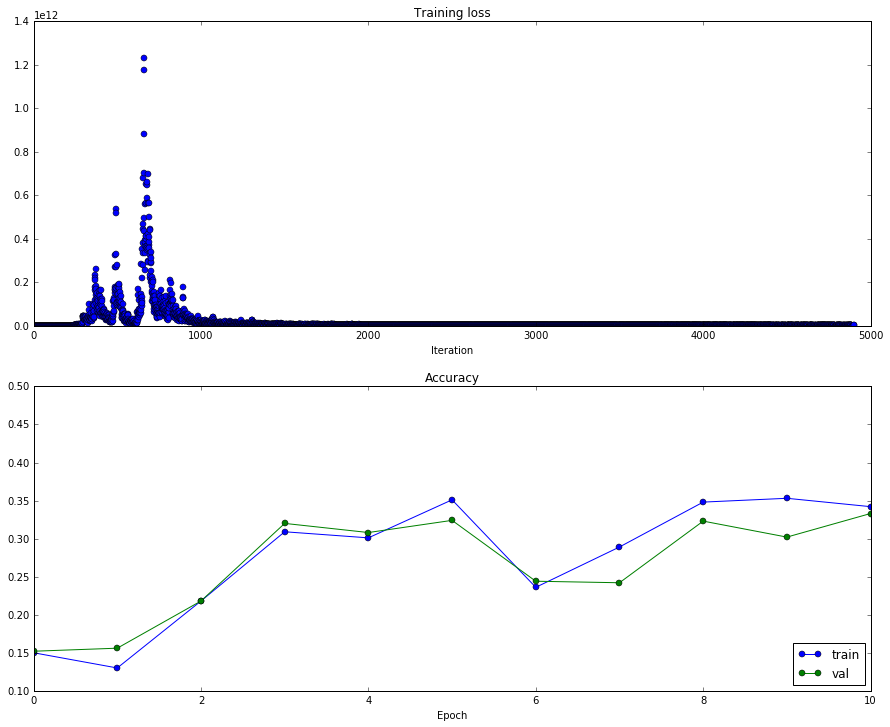

In [5]:
# Run this cell to visualize training loss and train / val accuracy

plt.subplot(2, 1, 1)
plt.title('Training loss')
plt.plot(solver.loss_history, 'o')
plt.xlabel('Iteration')

plt.subplot(2, 1, 2)
plt.title('Accuracy')
plt.plot(solver.train_acc_history, '-o', label='train')
plt.plot(solver.val_acc_history, '-o', label='val')
plt.plot([0.5] * len(solver.val_acc_history), 'k--')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.gcf().set_size_inches(15, 12)
plt.show()

# Multilayer network
Next you will implement a fully-connected network with an arbitrary number of hidden layers.

Read through the `FullyConnectedNet` class in the file `cs231n/classifiers/fc_net.py`.

Implement the initialization, the forward pass, and the backward pass. For the moment don't worry about implementing dropout or batch normalization; we will add those features soon.

## Initial loss and gradient check

As a sanity check, run the following to check the initial loss and to gradient check the network both with and without regularization. Do the initial losses seem reasonable?

For gradient checking, you should expect to see errors around 1e-6 or less.

In [7]:
N, D, H1, H2, C = 2, 15, 20, 30, 10
X = np.random.randn(N, D)
y = np.random.randint(C, size=(N,))

for reg in [0, 3.14]:
  print 'Running check with reg = ', reg
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2)

  loss, grads = model.loss_and_derivative(X, y)
  print 'Initial loss: ', loss

Running check with reg =  0
Initial loss:  8.99924888337
Running check with reg =  3.14
Initial loss:  8.96652808039


"\n  for name in sorted(grads):\n    f = lambda _: model.loss_and_derivative(X, y)[0]\n    grad_num = eval_numerical_gradient(f, model.params[name], verbose=False, h=1e-5)\n    print '%s relative error: %.2e' % (name, rel_error(grad_num, grads[name]))\n"

As another sanity check, make sure you can overfit a small dataset of 50 images. First we will try a three-layer network with 100 units in each hidden layer. You will need to tweak the learning rate and initialization scale, but you should be able to overfit and achieve 100% training accuracy within 20 epochs.

(Iteration 1 / 40) loss: inf
(Epoch 0 / 20) train acc: 0.220000; val_acc: 0.120000
(Epoch 1 / 20) train acc: 0.240000; val_acc: 0.092000
(Epoch 2 / 20) train acc: 0.540000; val_acc: 0.135000
(Epoch 3 / 20) train acc: 0.640000; val_acc: 0.147000
(Epoch 4 / 20) train acc: 0.840000; val_acc: 0.151000
(Epoch 5 / 20) train acc: 0.820000; val_acc: 0.133000
(Iteration 11 / 40) loss: 9.510804
(Epoch 6 / 20) train acc: 0.900000; val_acc: 0.149000
(Epoch 7 / 20) train acc: 0.880000; val_acc: 0.151000
(Epoch 8 / 20) train acc: 0.940000; val_acc: 0.153000
(Epoch 9 / 20) train acc: 1.000000; val_acc: 0.154000
(Epoch 10 / 20) train acc: 1.000000; val_acc: 0.154000
(Iteration 21 / 40) loss: 3.241766
(Epoch 11 / 20) train acc: 1.000000; val_acc: 0.154000
(Epoch 12 / 20) train acc: 1.000000; val_acc: 0.154000
(Epoch 13 / 20) train acc: 1.000000; val_acc: 0.154000
(Epoch 14 / 20) train acc: 1.000000; val_acc: 0.154000
(Epoch 15 / 20) train acc: 1.000000; val_acc: 0.154000
(Iteration 31 / 40) loss: 3.241

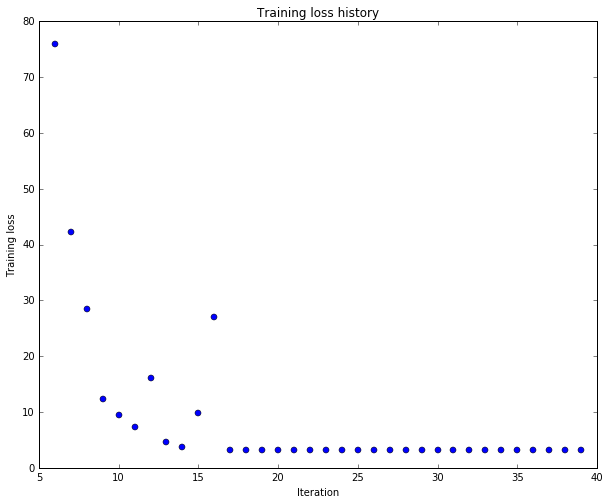

In [57]:
# TODO: Use a three-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

weight_scale = 1.0/7
learning_rate = 1e-3
model = FullyConnectedNet([100, 100], reg = 0.001,
              weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

Now try to use a five-layer network with 100 units on each layer to overfit 50 training examples. Again you will have to adjust the learning rate and weight initialization, but you should be able to achieve 100% training accuracy within 20 epochs.

-3.1149671689
(Iteration 1 / 40) loss: inf
(Epoch 0 / 20) train acc: 0.120000; val_acc: 0.105000
(Epoch 1 / 20) train acc: 0.160000; val_acc: 0.113000
(Epoch 2 / 20) train acc: 0.100000; val_acc: 0.101000
(Epoch 3 / 20) train acc: 0.300000; val_acc: 0.120000
(Epoch 4 / 20) train acc: 0.360000; val_acc: 0.116000
(Epoch 5 / 20) train acc: 0.520000; val_acc: 0.134000
(Iteration 11 / 40) loss: 21.498090
(Epoch 6 / 20) train acc: 0.560000; val_acc: 0.122000
(Epoch 7 / 20) train acc: 0.700000; val_acc: 0.119000
(Epoch 8 / 20) train acc: 0.740000; val_acc: 0.126000
(Epoch 9 / 20) train acc: 0.880000; val_acc: 0.119000
(Epoch 10 / 20) train acc: 0.940000; val_acc: 0.134000
(Iteration 21 / 40) loss: 4.028678
(Epoch 11 / 20) train acc: 0.920000; val_acc: 0.124000
(Epoch 12 / 20) train acc: 0.820000; val_acc: 0.120000
(Epoch 13 / 20) train acc: 0.940000; val_acc: 0.128000
(Epoch 14 / 20) train acc: 0.920000; val_acc: 0.126000
(Epoch 15 / 20) train acc: 0.960000; val_acc: 0.125000
(Iteration 31 / 

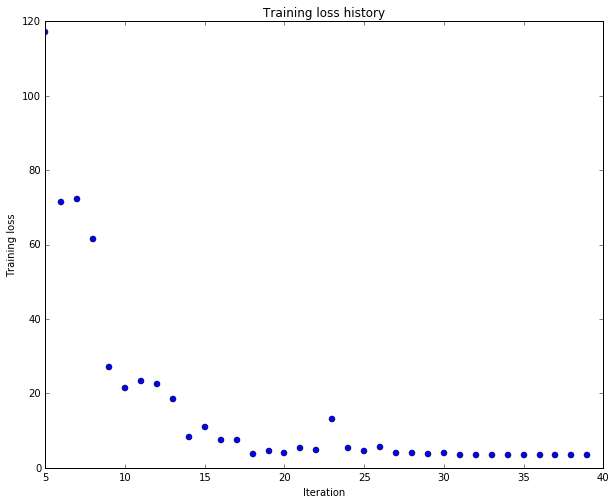

In [58]:
# TODO: Use a five-layer Net to overfit 50 training examples.

num_train = 50
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

print np.mean(small_data['X_train'])

learning_rate = 1e-3
weight_scale = 1.0/7
model = FullyConnectedNet([100, 100, 100, 100], reg = 0.001, 
                weight_scale=weight_scale, dtype=np.float64)
solver = Solver(model, small_data,
                print_every=10, num_epochs=20, batch_size=25,
                update_rule='sgd',
                optim_config={
                  'learning_rate': learning_rate,
                }
         )
solver.train()

plt.plot(solver.loss_history, 'o')
plt.title('Training loss history')
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.show()

# Inline question: 
Did you notice anything about the comparative difficulty of training the three-layer net vs training the five layer net?

# Answer:
[FILL THIS IN]


# Update rules
So far we have used vanilla stochastic gradient descent (SGD) as our update rule. More sophisticated update rules can make it easier to train deep networks. We will implement a few of the most commonly used update rules and compare them to vanilla SGD.

# SGD+Momentum
Stochastic gradient descent with momentum is a widely used update rule that tends to make deep networks converge faster than vanilla stochstic gradient descent.

Open the file `cs231n/optim.py` and read the documentation at the top of the file to make sure you understand the API. Implement the SGD+momentum update rule in the function `sgd_momentum` and run the following to check your implementation. You should see errors less than 1e-8.

In [62]:
from cs231n.optim import sgd_momentum

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
v = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-3, 'velocity': v}
next_w, _ = sgd_momentum(w, dw, config=config)

expected_next_w = np.asarray([
  [ 0.1406,      0.20738947,  0.27417895,  0.34096842,  0.40775789],
  [ 0.47454737,  0.54133684,  0.60812632,  0.67491579,  0.74170526],
  [ 0.80849474,  0.87528421,  0.94207368,  1.00886316,  1.07565263],
  [ 1.14244211,  1.20923158,  1.27602105,  1.34281053,  1.4096    ]])
expected_velocity = np.asarray([
  [ 0.5406,      0.55475789,  0.56891579, 0.58307368,  0.59723158],
  [ 0.61138947,  0.62554737,  0.63970526,  0.65386316,  0.66802105],
  [ 0.68217895,  0.69633684,  0.71049474,  0.72465263,  0.73881053],
  [ 0.75296842,  0.76712632,  0.78128421,  0.79544211,  0.8096    ]])

print 'next_w error: ', rel_error(next_w, expected_next_w)
print 'velocity error: ', rel_error(expected_velocity, config['velocity'])

next_w error:  8.88234703351e-09
velocity error:  4.26928774328e-09


Once you have done so, run the following to train a six-layer network with both SGD and SGD+momentum. You should see the SGD+momentum update rule converge faster.

running with  sgd
(Iteration 1 / 200) loss: 2.605040
(Epoch 0 / 5) train acc: 0.116000; val_acc: 0.091000
(Iteration 11 / 200) loss: 2.153719
(Iteration 21 / 200) loss: 2.160900
(Iteration 31 / 200) loss: 2.055107
(Epoch 1 / 5) train acc: 0.285000; val_acc: 0.248000
(Iteration 41 / 200) loss: 1.921422
(Iteration 51 / 200) loss: 2.049895
(Iteration 61 / 200) loss: 1.904316
(Iteration 71 / 200) loss: 1.955260
(Epoch 2 / 5) train acc: 0.338000; val_acc: 0.287000
(Iteration 81 / 200) loss: 1.832507
(Iteration 91 / 200) loss: 1.794269
(Iteration 101 / 200) loss: 1.809268
(Iteration 111 / 200) loss: 1.705383
(Epoch 3 / 5) train acc: 0.378000; val_acc: 0.314000
(Iteration 121 / 200) loss: 1.786146
(Iteration 131 / 200) loss: 1.903126
(Iteration 141 / 200) loss: 1.889911
(Iteration 151 / 200) loss: 1.861499
(Epoch 4 / 5) train acc: 0.400000; val_acc: 0.299000
(Iteration 161 / 200) loss: 1.840471
(Iteration 171 / 200) loss: 1.756863
(Iteration 181 / 200) loss: 1.767475
(Iteration 191 / 200) los

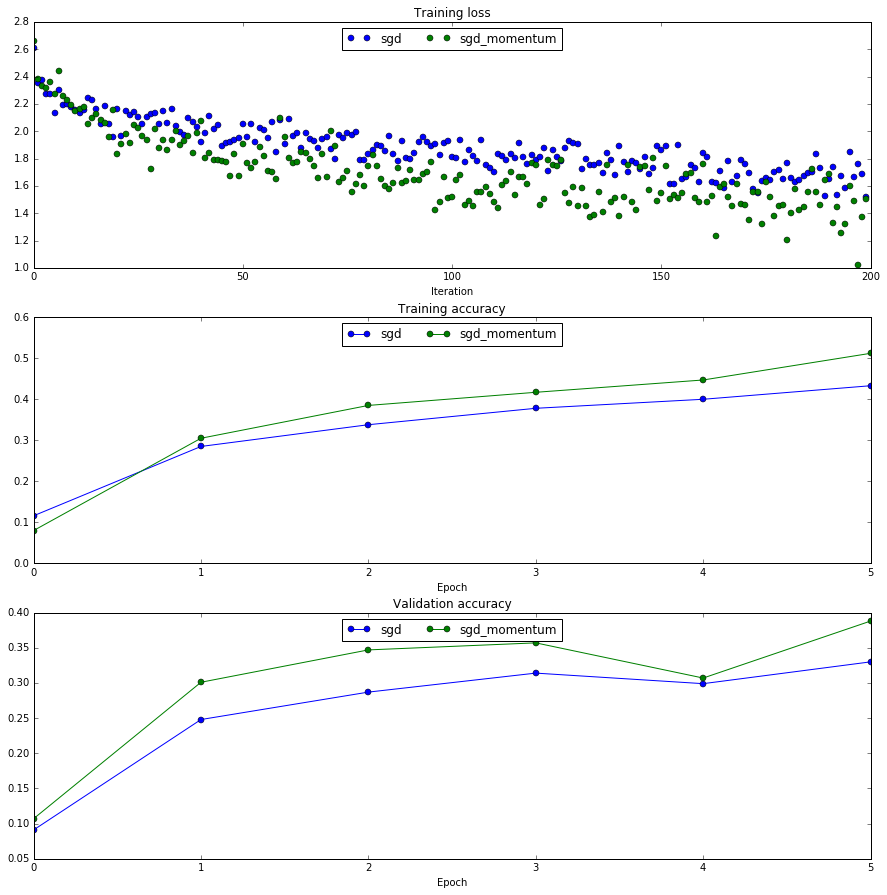

In [63]:
num_train = 4000
small_data = {
  'X_train': data['X_train'][:num_train],
  'y_train': data['y_train'][:num_train],
  'X_val': data['X_val'],
  'y_val': data['y_val'],
}

solvers = {}

for update_rule in ['sgd', 'sgd_momentum']:
  print 'running with ', update_rule
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': 1e-2,
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# RMSProp and Adam
RMSProp [1] and Adam [2] are update rules that set per-parameter learning rates by using a running average of the second moments of gradients.

In the file `cs231n/optim.py`, implement the RMSProp update rule in the `rmsprop` function and implement the Adam update rule in the `adam` function, and check your implementations using the tests below.

[1] Tijmen Tieleman and Geoffrey Hinton. "Lecture 6.5-rmsprop: Divide the gradient by a running average of its recent magnitude." COURSERA: Neural Networks for Machine Learning 4 (2012).

[2] Diederik Kingma and Jimmy Ba, "Adam: A Method for Stochastic Optimization", ICLR 2015.

In [67]:
# Test RMSProp implementation; you should see errors less than 1e-7
from cs231n.optim import rmsprop

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
cache = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'cache': cache}
next_w, _ = rmsprop(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.39223849, -0.34037513, -0.28849239, -0.23659121, -0.18467247],
  [-0.132737,   -0.08078555, -0.02881884,  0.02316247,  0.07515774],
  [ 0.12716641,  0.17918792,  0.23122175,  0.28326742,  0.33532447],
  [ 0.38739248,  0.43947102,  0.49155973,  0.54365823,  0.59576619]])
expected_cache = np.asarray([
  [ 0.5976,      0.6126277,   0.6277108,   0.64284931,  0.65804321],
  [ 0.67329252,  0.68859723,  0.70395734,  0.71937285,  0.73484377],
  [ 0.75037008,  0.7659518,   0.78158892,  0.79728144,  0.81302936],
  [ 0.82883269,  0.84469141,  0.86060554,  0.87657507,  0.8926    ]])

print 'next_w error: ', rel_error(expected_next_w, next_w)
print 'cache error: ', rel_error(expected_cache, config['cache'])

next_w error:  9.52468751104e-08
cache error:  2.64779558072e-09


In [72]:
# Test Adam implementation; you should see errors around 1e-7 or less
from cs231n.optim import adam

N, D = 4, 5
w = np.linspace(-0.4, 0.6, num=N*D).reshape(N, D)
dw = np.linspace(-0.6, 0.4, num=N*D).reshape(N, D)
m = np.linspace(0.6, 0.9, num=N*D).reshape(N, D)
v = np.linspace(0.7, 0.5, num=N*D).reshape(N, D)

config = {'learning_rate': 1e-2, 'm': m, 'v': v, 't': 5}
next_w, _ = adam(w, dw, config=config)

expected_next_w = np.asarray([
  [-0.40094747, -0.34836187, -0.29577703, -0.24319299, -0.19060977],
  [-0.1380274,  -0.08544591, -0.03286534,  0.01971428,  0.0722929],
  [ 0.1248705,   0.17744702,  0.23002243,  0.28259667,  0.33516969],
  [ 0.38774145,  0.44031188,  0.49288093,  0.54544852,  0.59801459]])
expected_v = np.asarray([
  [ 0.69966,     0.68908382,  0.67851319,  0.66794809,  0.65738853,],
  [ 0.64683452,  0.63628604,  0.6257431,   0.61520571,  0.60467385,],
  [ 0.59414753,  0.58362676,  0.57311152,  0.56260183,  0.55209767,],
  [ 0.54159906,  0.53110598,  0.52061845,  0.51013645,  0.49966,   ]])
expected_m = np.asarray([
  [ 0.48,        0.49947368,  0.51894737,  0.53842105,  0.55789474],
  [ 0.57736842,  0.59684211,  0.61631579,  0.63578947,  0.65526316],
  [ 0.67473684,  0.69421053,  0.71368421,  0.73315789,  0.75263158],
  [ 0.77210526,  0.79157895,  0.81105263,  0.83052632,  0.85      ]])

print 'next_w error: ', rel_error(expected_next_w, next_w)
print 'v error: ', rel_error(expected_v, config['v'])
print 'm error: ', rel_error(expected_m, config['m'])

next_w error:  1.13956917985e-07
v error:  4.20831403811e-09
m error:  4.21496319311e-09


Once you have debugged your RMSProp and Adam implementations, run the following to train a pair of deep networks using these new update rules:

running with  adam
(Iteration 1 / 200) loss: 2.603560
(Epoch 0 / 5) train acc: 0.165000; val_acc: 0.128000
(Iteration 11 / 200) loss: 2.063709
(Iteration 21 / 200) loss: 1.923255
(Iteration 31 / 200) loss: 1.847574
(Epoch 1 / 5) train acc: 0.374000; val_acc: 0.317000
(Iteration 41 / 200) loss: 1.835504
(Iteration 51 / 200) loss: 1.665227
(Iteration 61 / 200) loss: 1.884786
(Iteration 71 / 200) loss: 1.711646
(Epoch 2 / 5) train acc: 0.436000; val_acc: 0.356000
(Iteration 81 / 200) loss: 1.490509
(Iteration 91 / 200) loss: 1.564807
(Iteration 101 / 200) loss: 1.495586
(Iteration 111 / 200) loss: 1.398573
(Epoch 3 / 5) train acc: 0.488000; val_acc: 0.345000
(Iteration 121 / 200) loss: 1.396870
(Iteration 131 / 200) loss: 1.488349
(Iteration 141 / 200) loss: 1.492112
(Iteration 151 / 200) loss: 1.352142
(Epoch 4 / 5) train acc: 0.573000; val_acc: 0.381000
(Iteration 161 / 200) loss: 1.306478
(Iteration 171 / 200) loss: 1.266364
(Iteration 181 / 200) loss: 1.393048
(Iteration 191 / 200) lo

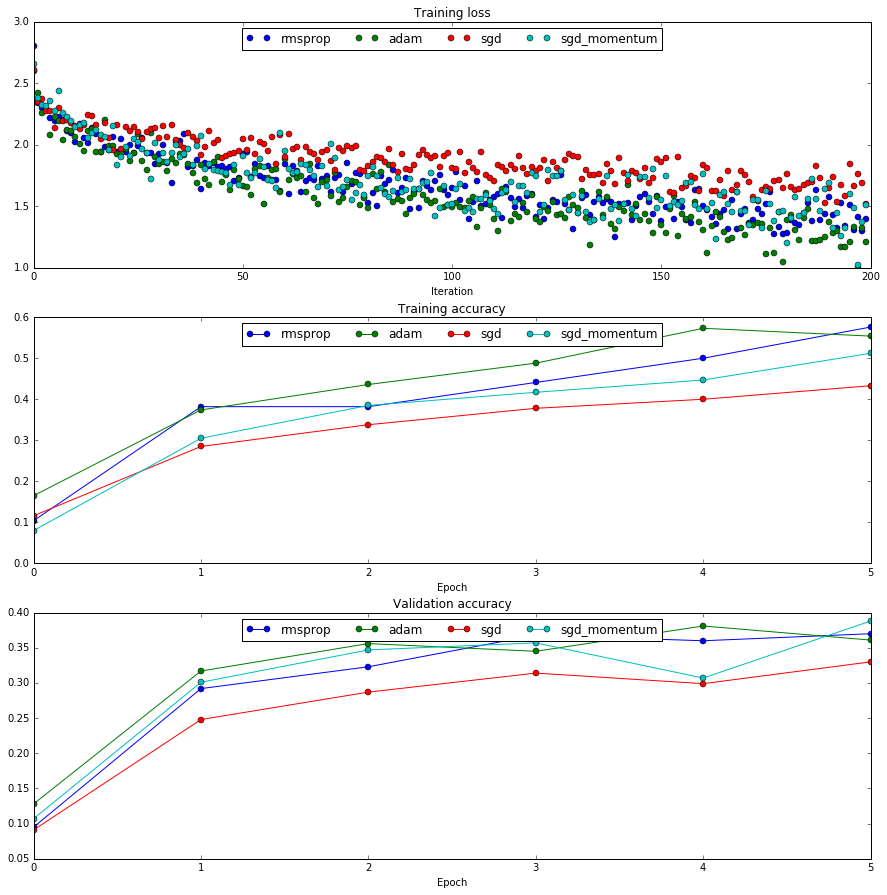

In [73]:
learning_rates = {'rmsprop': 1e-4, 'adam': 1e-3}
for update_rule in ['adam', 'rmsprop']:
  print 'running with ', update_rule
  model = FullyConnectedNet([100, 100, 100, 100, 100], weight_scale=5e-2)

  solver = Solver(model, small_data,
                  num_epochs=5, batch_size=100,
                  update_rule=update_rule,
                  optim_config={
                    'learning_rate': learning_rates[update_rule]
                  },
                  verbose=True)
  solvers[update_rule] = solver
  solver.train()
  print

plt.subplot(3, 1, 1)
plt.title('Training loss')
plt.xlabel('Iteration')

plt.subplot(3, 1, 2)
plt.title('Training accuracy')
plt.xlabel('Epoch')

plt.subplot(3, 1, 3)
plt.title('Validation accuracy')
plt.xlabel('Epoch')

for update_rule, solver in solvers.iteritems():
  plt.subplot(3, 1, 1)
  plt.plot(solver.loss_history, 'o', label=update_rule)
  
  plt.subplot(3, 1, 2)
  plt.plot(solver.train_acc_history, '-o', label=update_rule)

  plt.subplot(3, 1, 3)
  plt.plot(solver.val_acc_history, '-o', label=update_rule)
  
for i in [1, 2, 3]:
  plt.subplot(3, 1, i)
  plt.legend(loc='upper center', ncol=4)
plt.gcf().set_size_inches(15, 15)
plt.show()

# Train a good model!
Train the best fully-connected model that you can on CIFAR-10, storing your best model in the `best_model` variable. We require you to get at least 50% accuracy on the validation set using a fully-connected net.

If you are careful it should be possible to get accuracies above 55%, but we don't require it for this part and won't assign extra credit for doing so. Later in the assignment we will ask you to train the best convolutional network that you can on CIFAR-10, and we would prefer that you spend your effort working on convolutional nets rather than fully-connected nets.

You might find it useful to complete the `BatchNormalization.ipynb` and `Dropout.ipynb` notebooks before completing this part, since those techniques can help you train powerful models.

In [ ]:
best_model = None
################################################################################
# TODO: Train the best FullyConnectedNet that you can on CIFAR-10. You might   #
# batch normalization and dropout useful. Store your best model in the         #
# best_model variable.                                                         #
################################################################################
pass
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Test you model
Run your best model on the validation and test sets. You should achieve above 50% accuracy on the validation set.

In [ ]:
y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
y_val_pred = np.argmax(best_model.loss(X_val), axis=1)
print 'Validation set accuracy: ', (y_val_pred == y_val).mean()
print 'Test set accuracy: ', (y_test_pred == y_test).mean()